In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
df = pd.read_csv("BostonHousing.csv")

In [32]:
DF

NameError: name 'DF' is not defined

In [33]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [34]:
x = df.drop("medv", axis = 1)
y = df[["medv"]]

In [35]:
x


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [36]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, random_state = 42 , test_size = 0.2)

In [38]:
model = Sequential()
model.add(Dense(128, input_shape=(13,),activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer = 'adam', loss = "mse", metrics = ['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1792      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [39]:
his =model.fit(xtrain,ytrain, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 142.9060 - mae: 9.7123
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 106.0283 - mae: 7.8948
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 96.3271 - mae: 7.3592
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 64.7897 - mae: 5.7059
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 62.6606 - mae: 5.6590
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 62.3484 - mae: 5.7018
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 59.1004 - mae: 5.4144
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 62.2515 - mae: 5.8454
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 57.8012 - mae: 5.3487
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 56.2646 - mae: 5.1290
Epoch 11/100
13/13 [===========================

13/13 [==============================] - 0s 2ms/step - loss: 20.8879 - mae: 3.3231
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 23.5727 - mae: 3.6325
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 31.1115 - mae: 4.2214
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 21.0510 - mae: 3.3879
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 21.7826 - mae: 3.5238
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 20.5967 - mae: 3.3736
Epoch 92/100
13/13 [==============================] - 0s 1ms/step - loss: 22.5005 - mae: 3.5780
Epoch 93/100
13/13 [==============================] - 0s 1ms/step - loss: 20.4109 - mae: 3.4283
Epoch 94/100
13/13 [==============================] - 0s 1ms/step - loss: 17.5742 - mae: 3.0985
Epoch 95/100
13/13 [==============================] - 0s 1ms/step - loss: 19.0953 - mae: 3.2678
Epoch 96/100
13/13 [==============================] -

In [40]:
a,b = model.evaluate(xtest,ytest)

4/4 [==============================] - 0s 1ms/step - loss: 20.7640 - mae: 3.2521


In [45]:
df = pd.DataFrame(his.history)

<AxesSubplot:>

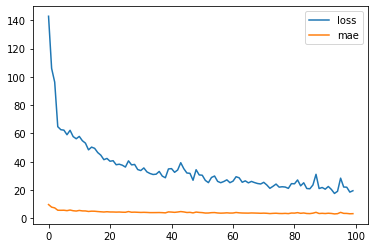

In [46]:
df.plot()

In [47]:
a

20.764019012451172

In [49]:
b

3.252066135406494